In [3]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.path.abspath("E:/shuai/Mask_RCNN-master")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.balloon import balloon

In [4]:
config = balloon.BalloonConfig()
BALLOON_DIR = os.path.join(ROOT_DIR, "balloon_dataset", "balloon")
print(BALLOON_DIR)

E:\shuai\Mask_RCNN-master\balloon_dataset\balloon


In [8]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases
# dataset is BalloonDataset, so it may obey rules of BalloonDataset class 
# normal dataset class in python for example item() is not availble.
dataset = balloon.BalloonDataset()
dataset.load_balloon(BALLOON_DIR, "train")
# Must call before using the dataset
dataset.prepare()
# This dataset has 
# |Class_info: source, id, name
# |image_info: id, source, path
#===============scripts===================
# dataset is a class BalloonDataset class
# which inherit Father Class Dataset in utils
# The code to prepare data can be used for the future work
# details about the class of Dataset can be found in 
# https://github.com/matterport/Mask_RCNN/blob/master/mrcnn/utils.py
#=========================================
print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 61
Class Count: 2
  0. BG                                                
  1. balloon                                           


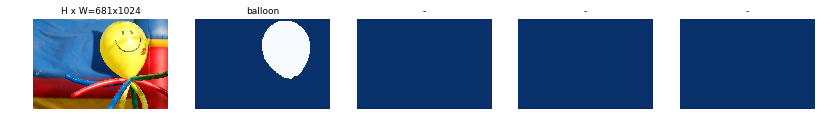

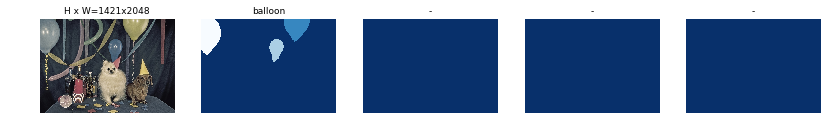

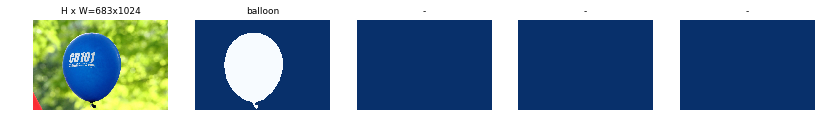

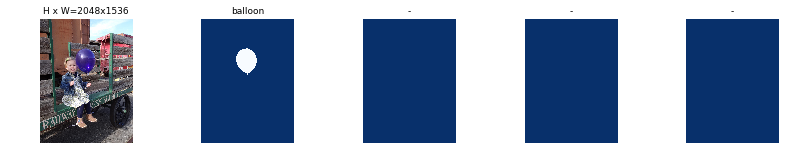

In [9]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names) 


### The following code were writtern to output the ‘mask’ figures by Shuai Zhu.

[15]
image shape is (1536, 2048, 3)
mask shape is (1536, 2048, 2)
number of class_ids is 2
The picture has 2 mask(s)
cols is 4 and rows is 1
The 1-th mask belongs to class 1 and class name is ['BG', 'balloon']
The 2-th mask belongs to class 1 and class name is ['BG', 'balloon']


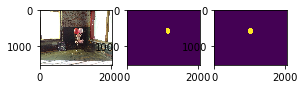

type of contours is <class 'list'> and its shape is (1, 659, 2)
type of verts is <class 'numpy.ndarray'> and its shape is (659, 2)
[[ 1056.    682.5]
 [ 1055.    682.5]
 [ 1054.    682.5]
 ..., 
 [ 1057.    681.5]
 [ 1056.5   682. ]
 [ 1056.    682.5]]


In [12]:
image_ids = np.random.choice(dataset.image_ids, 1)
print(image_ids)
image_ids = [13]
for image_id in image_ids:
    image = dataset.load_image(image_id)
    print('image shape is {}'.format(np.shape(image)))
    mask, class_ids = dataset.load_mask(image_id)
    print('mask shape is {}'.format(np.shape(mask)))
    print('number of class_ids is {}'.format(len(class_ids)))
    print('The picture has {} mask(s)'.format(np.shape(mask)[2]))
    cols = 4
    rows = np.ceil(np.shape(mask)[2]/cols).astype(int)
    print('cols is {} and rows is {}'.format(cols,rows))
    plt.subplot(rows,cols,1)
    plt.imshow(image)
    for i in range(np.shape(mask)[2]): 
        plt.subplot(rows, cols, i+2)
        _mask = mask[:,:,i]
        print('The {}-th mask belongs to class {} and class name is {}'.format(i+1, class_ids[i], dataset.class_names))
        plt.imshow(_mask.astype(np.uint8)) # the build in mask is bool format
    plt.show()

from skimage.measure import find_contours
from skimage import img_as_float
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch

contours = find_contours(_mask, 0.5) ## find_contours to find the edge and return a closed vector [N,2]

print('type of contours is {} and its shape is {}'.format(type(contours),np.shape(contours)))
axes = plt.gca()
for verts in contours:
    verts = np.fliplr(verts) - 1
    print('type of verts is {} and its shape is {}'.format(type(verts),np.shape(verts)))
    print(verts)
    patch = Polygon(verts, facecolor="none")
    axes.add_patch(patch)
plt.savefig('test.jpeg')
plt.close()

### Bounding Boxes

[[ 63 178 356 430]]
image_id  53 E:\shuai\Mask_RCNN-master\balloon_dataset\balloon\train\332344155_71be3a3b22_b.jpg
image                    shape: (852, 1024, 3)        min:    0.00000  max:  255.00000  uint8
mask                     shape: (852, 1024, 1)        min:    0.00000  max:    1.00000  uint8
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:   63.00000  max:  430.00000  int32


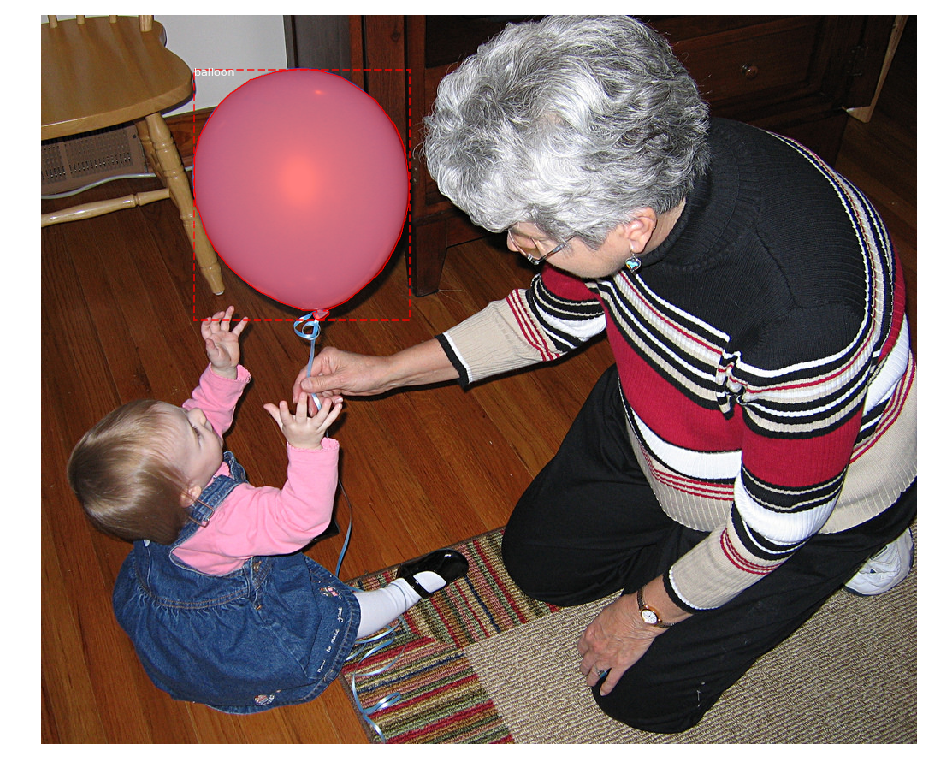

In [85]:
# Load random image and mask.
# image_id = random.choice(dataset.image_ids)
image_id = 53
# print('The image id is {}'.format(image_id))
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

### resize images

=========== raw image ===============
image                    shape: (1024, 768, 3)        min:    0.00000  max:  255.00000  uint8
image_id:  55 E:\shuai\Mask_RCNN-master\balloon_dataset\balloon\train\155815494_800fc9aa32_b.jpg
Original shape:  (1024, 768, 3)
=========== resized image ===============
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  uint8
class_ids                shape: (2,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (2, 4)                min:  181.00000  max: 1024.00000  int32


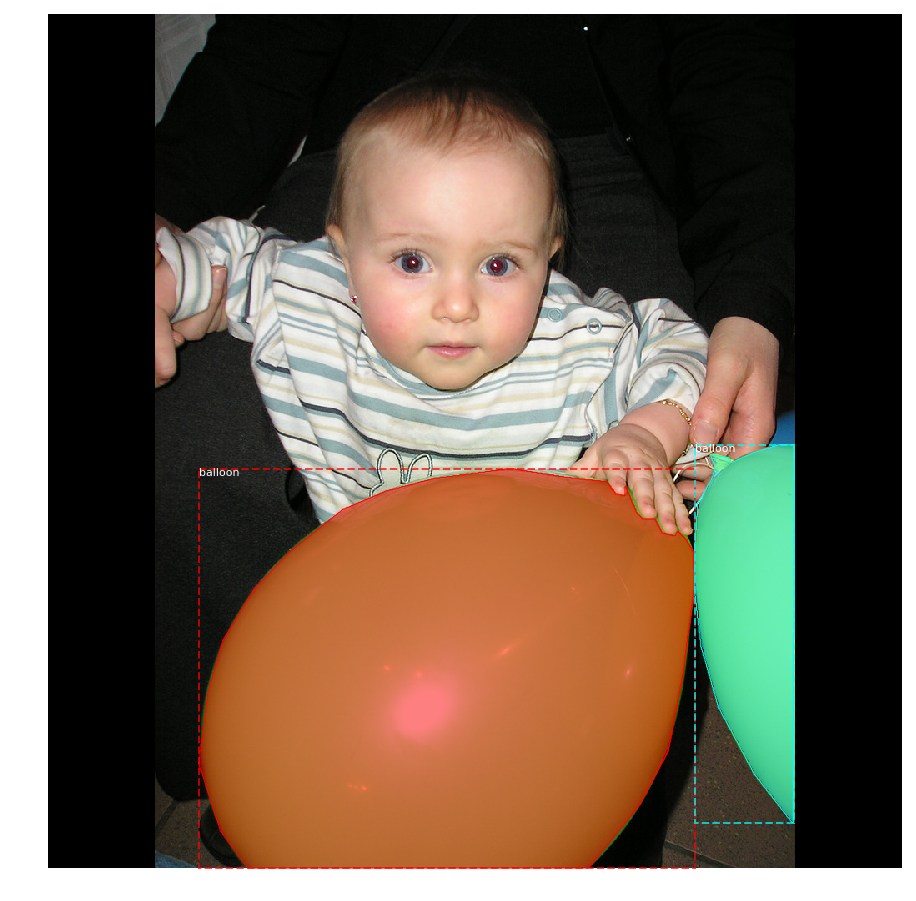

In [89]:
# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
print('=========== raw image ===============')
log("image", image)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
print('=========== resized image ===============')
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)